## The Stock Market Data

`Smarket` Datensatz - S&P 500 stock index über 1250 Tage zwischen 2001 und 2005 - Output: Prozentuale Returns

Für jeden der 5 vorhergehenden Tage gibt es die prozentualen Returns als Input-Variablen `Lag1` bis `Lag5`.

Außerdem die Output Variable `Direction` mit den Ausprägungen `Up` und `Down` die angeben ob der Markt an diesem Tag positiv oder negativ abgeschlossen wurde.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from ISLP import load_data
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from matplotlib.colors import ListedColormap


In [16]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [17]:
# Umwandlung der Purchase Variable Up -> 1 und Down -> 0
Smarket['Direction'] = Smarket['Direction'].map({'Down': 0, 'Up': 1})
Smarket['Direction'].describe()
print('Anteil Up: ', np.sum(Smarket['Direction'].astype('int64'))/Smarket.shape[0])
print('Anteil Down: ', 1-np.sum(Smarket['Direction'].astype('int64'))/Smarket.shape[0])

Anteil Up:  0.5184
Anteil Down:  0.48160000000000003


# KNN

In [18]:
X = Smarket.drop('Direction', axis=1)

# Skalierung der Inputdaten
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y = Smarket[['Direction']].values.ravel()

# Split in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definiere verschiedene Werte für k
k_values = np.linspace(1,20,20).astype('int64')

# Liste zum Speichern der F1-Scores für verschiedene k-Werte
f1_scores_knn = []

for k in k_values:
    # Training der Modelle
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    # Anwenden des Modells auf die Testdaten
    y_pred_knn = knn_model.predict(X_test) # Klassifikation

     # Berechne den F1-Score
    f1 = f1_score(y_test, y_pred_knn)

    # Speichere k und den F1-Score in der Liste
    f1_scores_knn.append((k, f1))

# Konvertiere die Liste in ein Pandas DataFrame
f1_scores_knn_df = pd.DataFrame(f1_scores_knn, columns=["k", "F1-Score"])

print(f1_scores_knn_df)

     k  F1-Score
0    1  0.806723
1    2  0.782609
2    3  0.823529
3    4  0.796209
4    5  0.853556
5    6  0.852174
6    7  0.862903
7    8  0.864407
8    9  0.864000
9   10  0.847458
10  11  0.864000
11  12  0.845188
12  13  0.892430
13  14  0.858333
14  15  0.885375
15  16  0.889796
16  17  0.879377
17  18  0.879032
18  19  0.873016
19  20  0.877049


In [20]:
print(X_scaled)

[[0.         0.49770061 0.44392304 ... 0.93214453 0.29868045 0.55194744]
 [0.         0.55194744 0.49770061 ... 0.3629282  0.33630024 0.55879869]
 [0.         0.55879869 0.55194744 ... 0.21567339 0.37731727 0.40347255]
 ...
 [1.         0.37231347 0.46597841 ... 0.45969029 0.42354456 0.47414359]
 [1.         0.47414359 0.37231347 ... 0.48559362 0.38130811 0.43397466]
 [1.         0.43397466 0.47414359 ... 0.50154857 0.36706837 0.4160488 ]]


## KNN für den Iris Datensatz

In [24]:
# Datensatz aus Bibliothek laden (Standarddatensatz)

iris = datasets.load_iris()
type(iris)

X = iris.data # Input Variablen
y = iris.target # Output Variable
df_iris = pd.DataFrame(X, columns = iris.feature_names) # Dataframe konstruieren
df_iris['target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


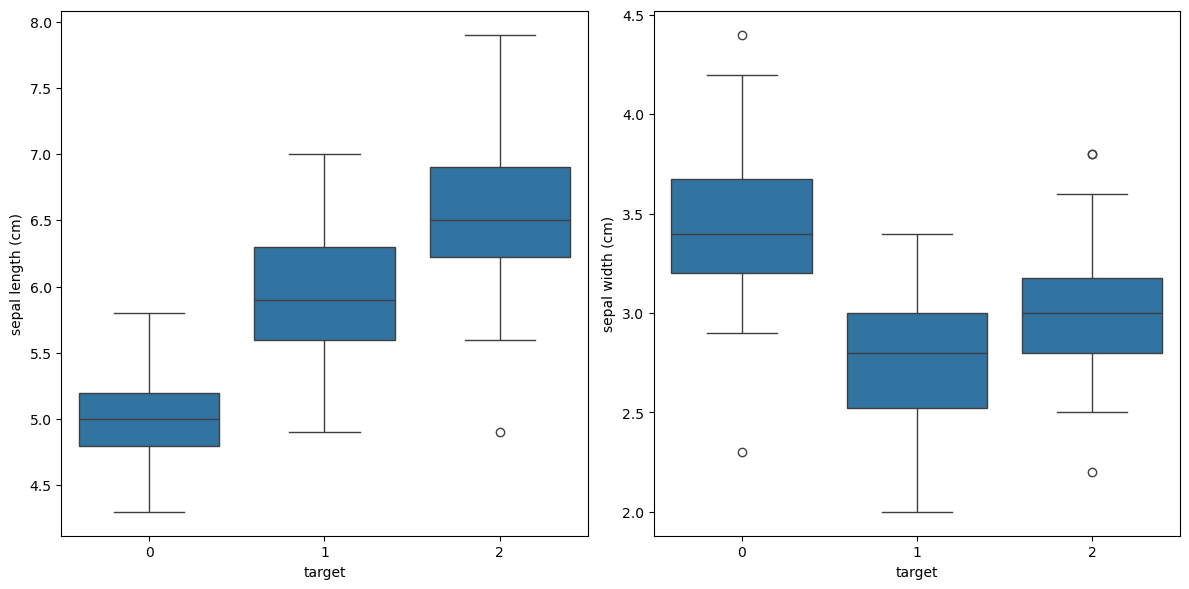

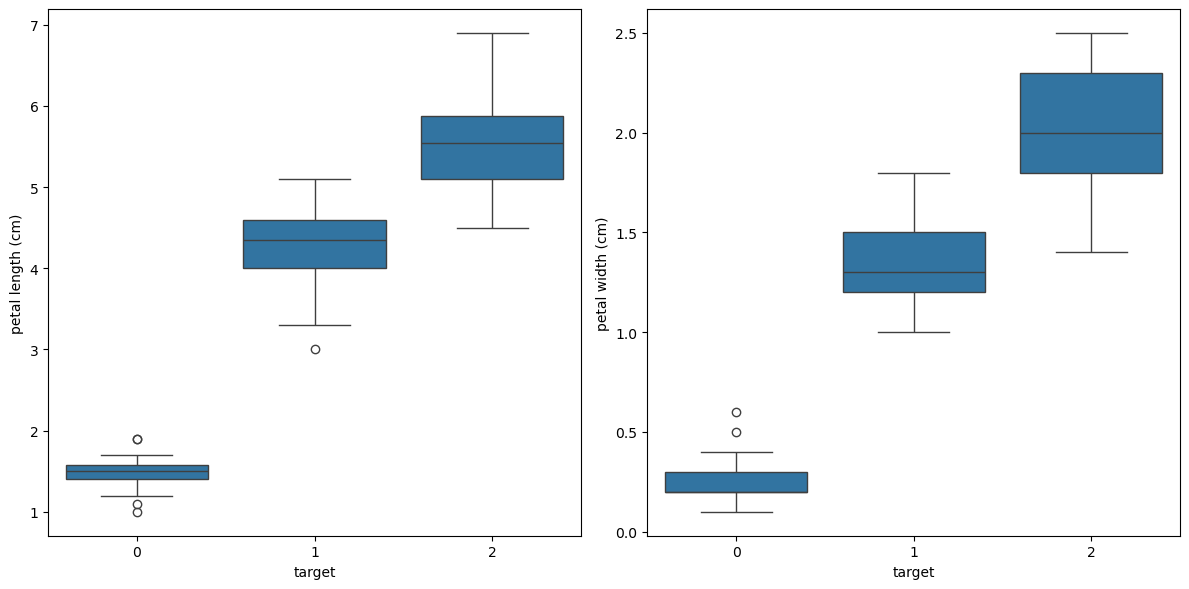

In [27]:
# Boxplots to visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="target", y="sepal length (cm)", data=df_iris)
plt.subplot(1, 2, 2)
sns.boxplot(x="target", y="sepal width (cm)", data=df_iris)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="target", y="petal length (cm)", data=df_iris)
plt.subplot(1, 2, 2)
sns.boxplot(x="target", y="petal width (cm)", data=df_iris)
plt.tight_layout()

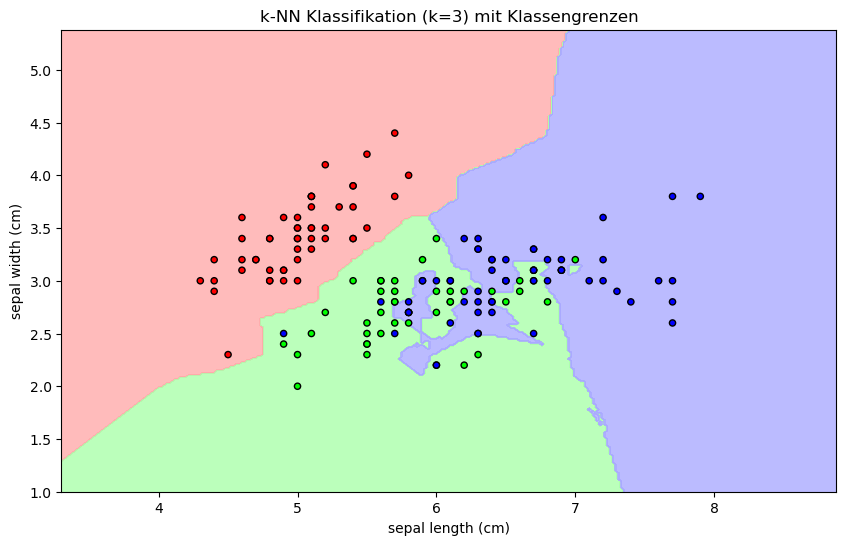

In [30]:
# Laden des Iris-Datensatzes
X = iris.data[:, :2]  # Nur die ersten zwei Merkmale
y = iris.target

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen und Trainieren des k-NN Klassifikators
knn = KNeighborsClassifier(n_neighbors=3)  # k=3 als Beispiel
knn.fit(X_train, y_train)

# Erstellen eines Gitternetzes von Punkten zum Plotten der Entscheidungsgrenzen
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Vorhersagen auf dem Gitternetz
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Erstellen der Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('k-NN Klassifikation (k=3) mit Klassengrenzen')
plt.show()


## Curse of Dimensionality

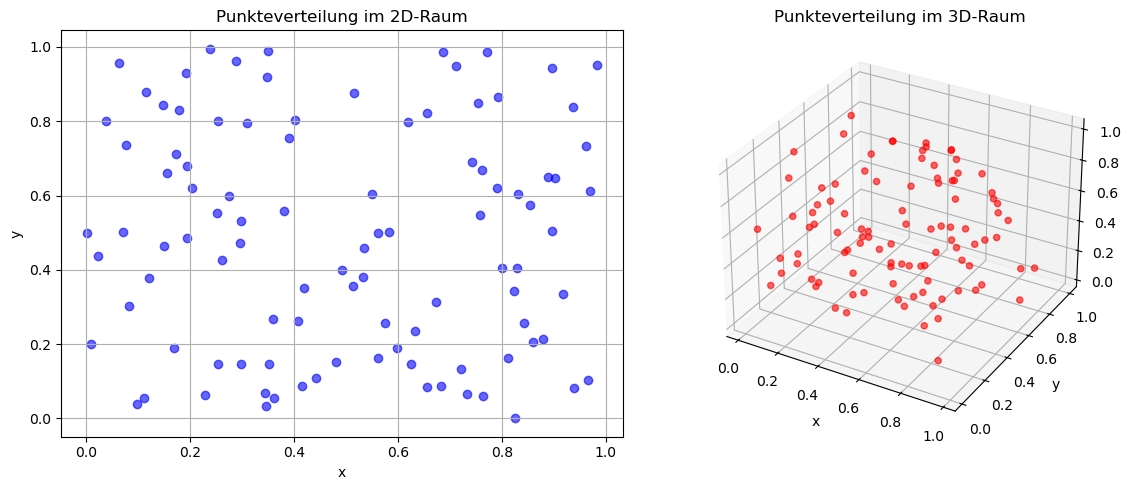

In [32]:
# Importiere notwendige Bibliotheken
from mpl_toolkits.mplot3d import Axes3D

# Anzahl der Punkte
n_points = 100

# Generiere zufällig Punkte im 2D- und 3D-Raum
points_2d = np.random.rand(n_points, 2)  # 2D: x, y
points_3d = np.random.rand(n_points, 3)  # 3D: x, y, z
points_4d = np.random.rand(n_points, 4)  # 3D: x, y, z
points_5d = np.random.rand(n_points, 5)  # 3D: x, y, z
points_6d = np.random.rand(n_points, 6)  # 3D: x, y, z

# Erstelle eine 2D-Grafik
plt.figure(figsize=(12, 5))

# 2D-Grafik
plt.subplot(1, 2, 1)
plt.scatter(points_2d[:, 0], points_2d[:, 1], c='blue', alpha=0.6)
plt.title('Punkteverteilung im 2D-Raum')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# 3D-Grafik
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='red', alpha=0.6)
ax.set_title('Punkteverteilung im 3D-Raum')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


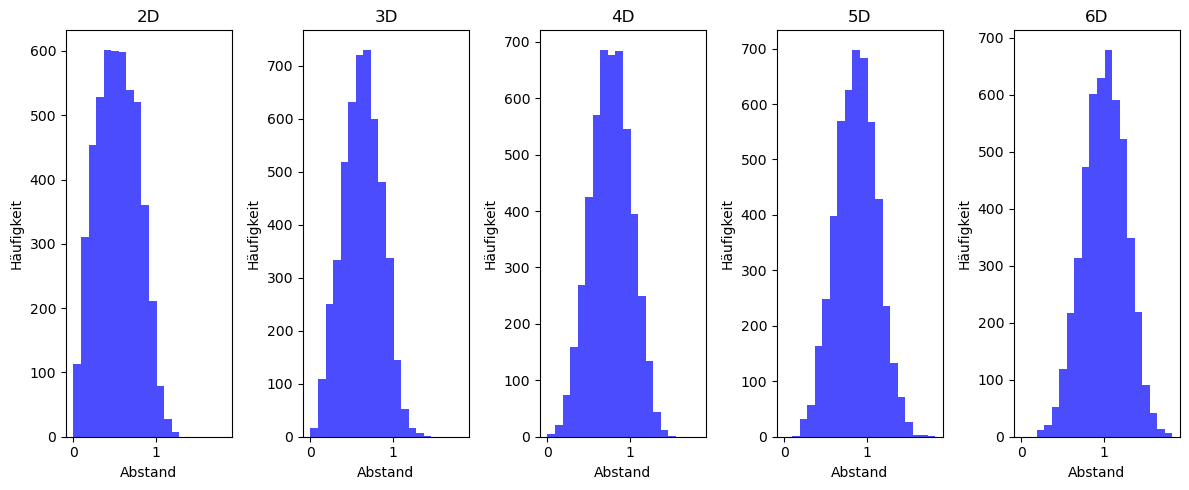

In [38]:
from scipy.spatial.distance import pdist

# Berechne die paarweisen Abstände im 2D- und 3D-Raum unter Verwendung der euklidischen Distanz
distances_2d = pdist(points_2d, metric='euclidean')
distances_3d = pdist(points_3d, metric='euclidean')
distances_4d = pdist(points_4d, metric='euclidean')
distances_5d = pdist(points_5d, metric='euclidean')
distances_6d = pdist(points_6d, metric='euclidean')

# Erstelle ein Histogramm für die Abstände im 2D- und 3D-Raum mit gleichen x-Achsen-Abschnitten
plt.figure(figsize=(12, 5))

# Definiere gemeinsame x-Achse (Bereich) für beide Histogramme
x_range = (0, max(distances_6d.max(), distances_2d.max()))

# Histogramm für 2D
plt.subplot(1, 5, 1)
plt.hist(distances_2d, bins=20, color='blue', alpha=0.7, range=x_range)
plt.title('2D')
plt.xlabel('Abstand')
plt.ylabel('Häufigkeit')

# Histogramm für 3D
plt.subplot(1, 5, 2)
plt.hist(distances_3d, bins=20, color='blue', alpha=0.7, range=x_range)
plt.title('3D')
plt.xlabel('Abstand')
plt.ylabel('Häufigkeit')

# Histogramm für 4D
plt.subplot(1, 5, 3)
plt.hist(distances_4d, bins=20, color='blue', alpha=0.7, range=x_range)
plt.title('4D')
plt.xlabel('Abstand')
plt.ylabel('Häufigkeit')

# Histogramm für 5D
plt.subplot(1, 5, 4)
plt.hist(distances_5d, bins=20, color='blue', alpha=0.7, range=x_range)
plt.title('5D')
plt.xlabel('Abstand')
plt.ylabel('Häufigkeit')

# Histogramm für 6D
plt.subplot(1, 5, 5)
plt.hist(distances_6d, bins=20, color='blue', alpha=0.7, range=x_range)
plt.title('6D')
plt.xlabel('Abstand')
plt.ylabel('Häufigkeit')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()
